<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_11_6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6- analogous to task 1, but using different low-rank regression models:
sklearn.cross_decomposition.PLSRegression(n_components=3), principal component
regression (make_pipeline(StandardScaler(), PCA(n_components=3), LinearRegression())),
and cross_decomposition.CCA(n_components=2) to make the analogous plot with R2 /
coefficient of determination as performance metric.

In [ ]:
%%capture
!pip install nilearn

In [ ]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_decomposition import PLSRegression as PLSR
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression as LR

In [ ]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# We predefine the scaler and models
scaler  = StandardScaler()

plsr    = PLSR(n_components=3, scale=False)
pca    = PCA(n_components=3)
lr        = LR()
cca     = CCA(n_components=2,  scale=False) 

# We create one pipeline for each model
pipe1 = make_pipeline(scaler, plsr)
pipe2 = make_pipeline(scaler, pca, lr)
pipe3 = make_pipeline(scaler, cca)

In [ ]:
# We define the iterating variable (versions) 
versions = list(range(1,43))

# We pre-allocate the variables where we will append the scores
score1_1 = []
score2_1 = []
score3_1 = []

In [ ]:
%%capture
for r in versions:
  brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
  crad = datasets.fetch_atlas_craddock_2012()
  atlas_nii = index_img(crad['scorr_mean'], (r)) # this needs to be modified for some tasks
  masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
  input_variables = masker.fit_transform(brain_data.gray_matter_maps)
  output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

  X, y = input_variables, output_variable                       # We reinstate X, y at the start of the loop in order to reset their values

  plsr_model = pipe1.fit(X, y)                                          # We define the plsr model
  score1 = plsr_model.score(X, y)                                 # We calculate the coefficient of determination
  score1_1.append(score1)                                           # We store the scores

  plr_model = pipe2.fit(X, y)                                          # We define the lda model
  score2 = plr_model.score(X,y)                                  # We calculate the coefficient of determination
  score2_1.append(score2)                                         # We store the scores

  cca_model = pipe3.fit(X, y)                                       # We define the cca model
  score3 = cca_model.score(X, y)                             # We calculate the coefficient of determination
  score3_1.append(score3)                                       # We store the scores

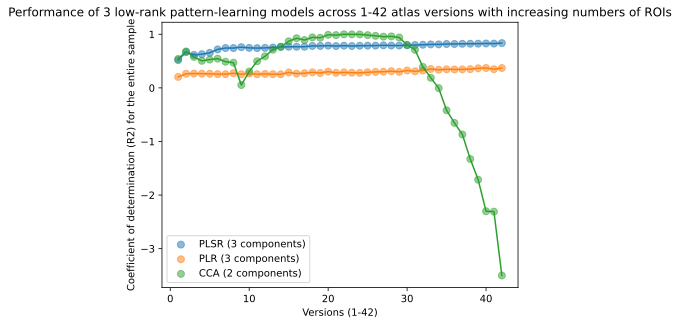

In [ ]:
# We're ready to plot
lab = ['PLSR (3 components)', 'PLR (3 components)', 'CCA (2 components)']
plt.style.use("default")
plt.scatter(versions,score1_1, s=50, alpha = 0.5, marker = 'o')
plt.scatter(versions,score2_1, s=50, alpha = 0.5, marker = 'o')
plt.scatter(versions,score3_1, s=50, alpha = 0.5, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="Performance of 3 low-rank pattern-learning models across 1-42 atlas versions with increasing numbers of ROIs",
    xlabel="Versions (1-42)",
    ylabel="Coefficient of determination (R2) for the entire sample",
)
plt.plot(versions,score1_1)
plt.plot(versions,score2_1)
plt.plot(versions,score3_1)
plt.show()